In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [4]:
# Set seaborn style for better visuals
sns.set_style("whitegrid")

# Read the dataset
data = pd.read_csv("pr_data.csv")

In [5]:
# 1. Dataset Overview
print("=== Dataset Overview ===")
print("Shape:", data.shape)
print("\nInfo:")
data.info()
print("\nSummary Statistics:")
display(data.describe())
print("\nMissing Values:")
display(data.isnull().sum())

=== Dataset Overview ===
Shape: (498, 19)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   pr_number                  498 non-null    int64 
 1   additions                  498 non-null    int64 
 2   deletions                  498 non-null    int64 
 3   changed_files              498 non-null    int64 
 4   comments                   498 non-null    int64 
 5   commits                    498 non-null    int64 
 6   author                     498 non-null    object
 7   author_account_age_days    498 non-null    int64 
 8   author_public_repos        498 non-null    int64 
 9   author_merged_prs          498 non-null    int64 
 10  author_site_admin          498 non-null    bool  
 11  title                      498 non-null    object
 12  labels                     206 non-null    object
 13  has_milestone   

,pr_number,additions,deletions,changed_files,comments,commits,author_account_age_days,author_public_repos,author_merged_prs,requested_reviewers_count,pr_age_days
count,498.000000,4.980000e+02,4.980000e+02,498.000000,498.0,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,23891.371486,6.854229e+03,9.360600e+03,30.291165,0.0,2.973896,3979.405622,76.116466,736.142570,0.200803,10.881526
std,21748.316313,1.095191e+05,1.415274e+05,351.469381,0.0,4.809586,1517.874755,88.253034,919.194579,0.545550,24.987965
min,270.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,12.000000,0.000000,0.000000,0.000000,-1.000000
25%,4784.250000,3.000000e+00,1.000000e+00,1.000000,0.0,1.000000,3004.000000,18.000000,70.000000,0.000000,0.000000
50%,19566.500000,1.300000e+01,4.000000e+00,2.000000,0.0,1.000000,4405.000000,69.000000,500.000000,0.000000,0.000000
75%,32930.750000,7.075000e+01,3.200000e+01,4.750000,0.0,3.000000,5094.500000,86.000000,1113.000000,0.000000,7.750000
max,60958.000000,2.261619e+06,2.365750e+06,6572.000000,0.0,30.000000,6188.000000,1290.000000,6947.000000,3.000000,162.000000



Missing Values:


pr_number                      0
additions                      0
deletions                      0
changed_files                  0
comments                       0
commits                        0
author                         0
author_account_age_days        0
author_public_repos            0
author_merged_prs              0
author_site_admin              0
title                          0
labels                       292
has_milestone                  0
requested_reviewers_count      0
description                   57
changed_files_list             1
pr_age_days                    0
merged                         0
dtype: int64


=== Target Variable Distribution (merged) ===


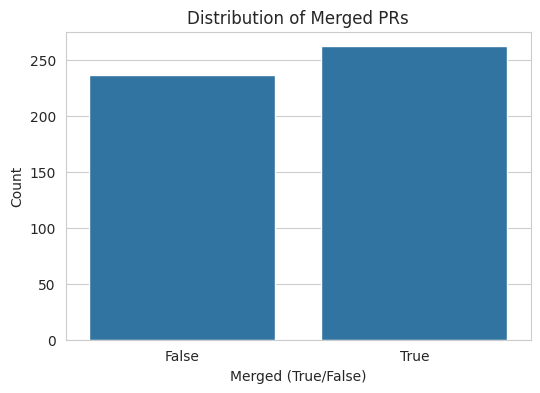

Proportion of Merged PRs:


merged
True     0.526104
False    0.473896
Name: proportion, dtype: float64

In [6]:
# 2. Target Variable Distribution
print("\n=== Target Variable Distribution (merged) ===")
plt.figure(figsize=(6, 4))
sns.countplot(x="merged", data=data)
plt.title("Distribution of Merged PRs")
plt.xlabel("Merged (True/False)")
plt.ylabel("Count")
plt.show()
print("Proportion of Merged PRs:")
display(data["merged"].value_counts(normalize=True))


=== Numeric Feature Distributions ===


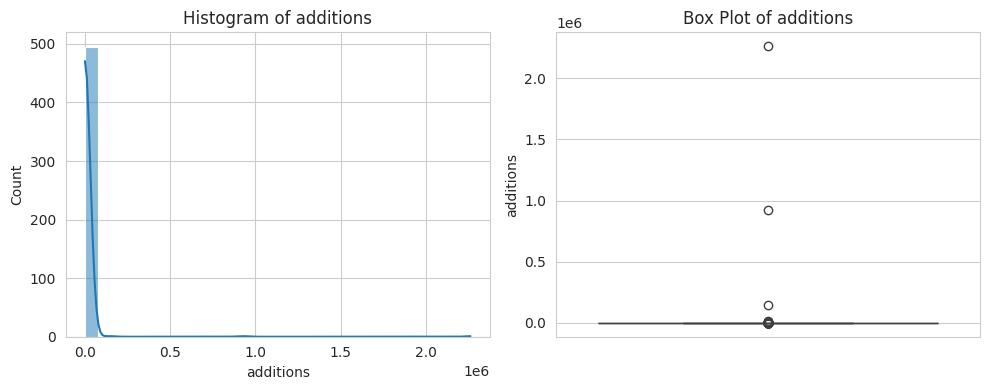

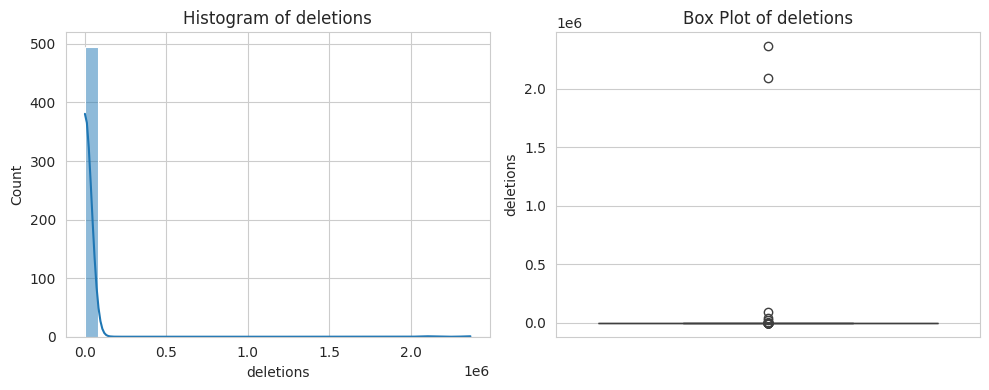

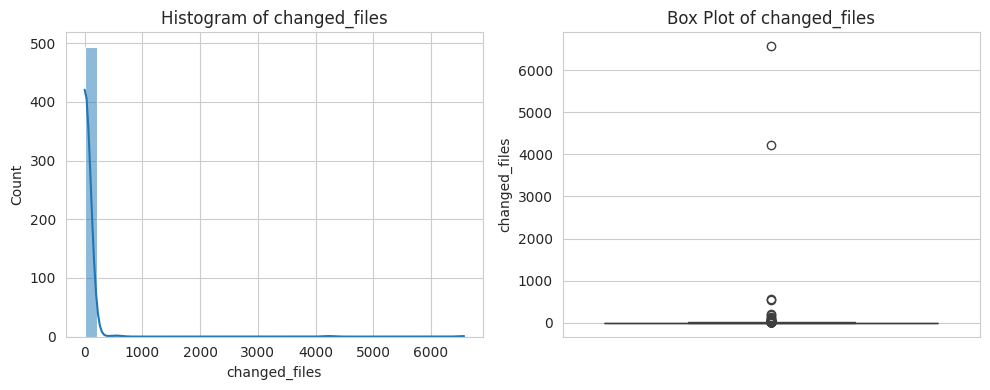

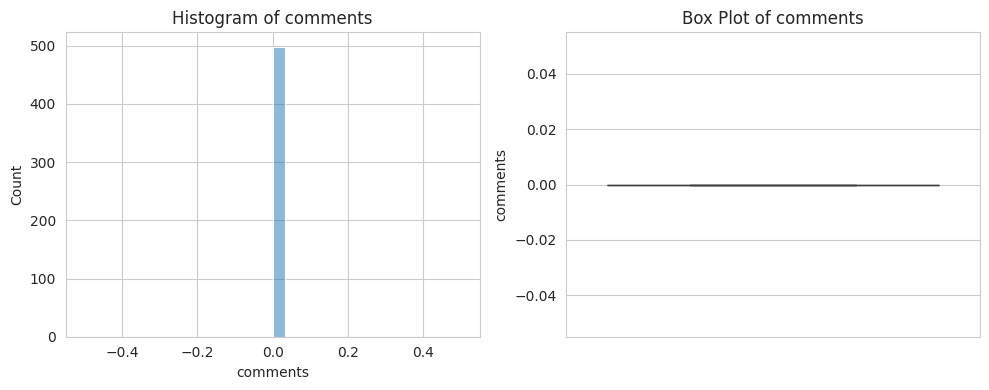

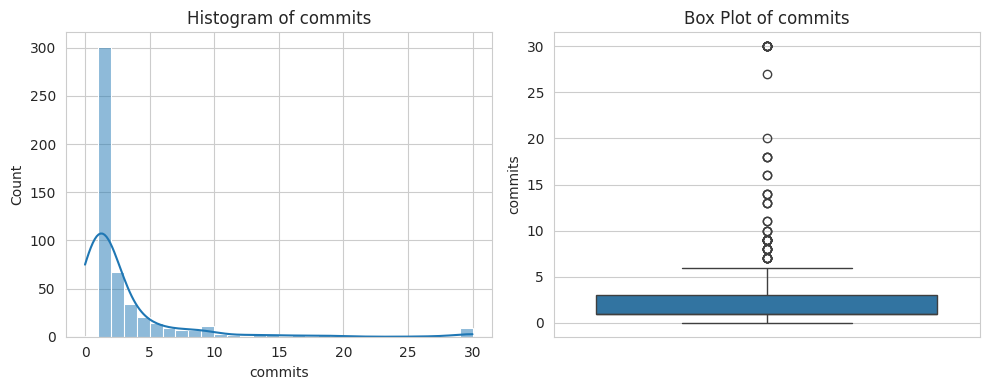

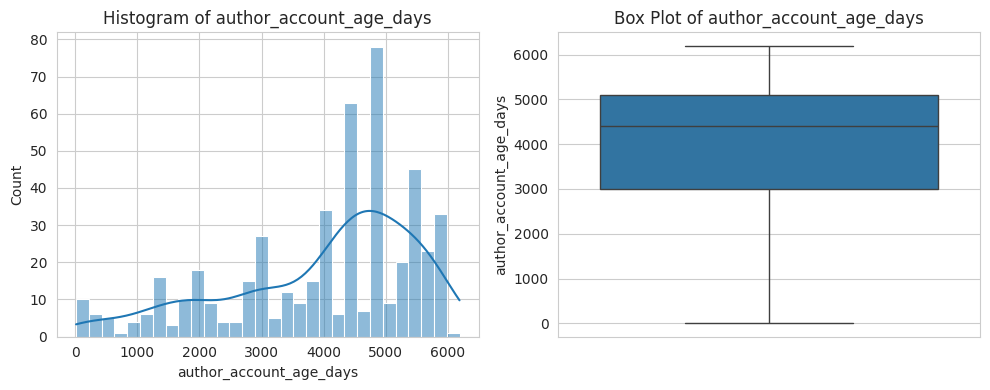

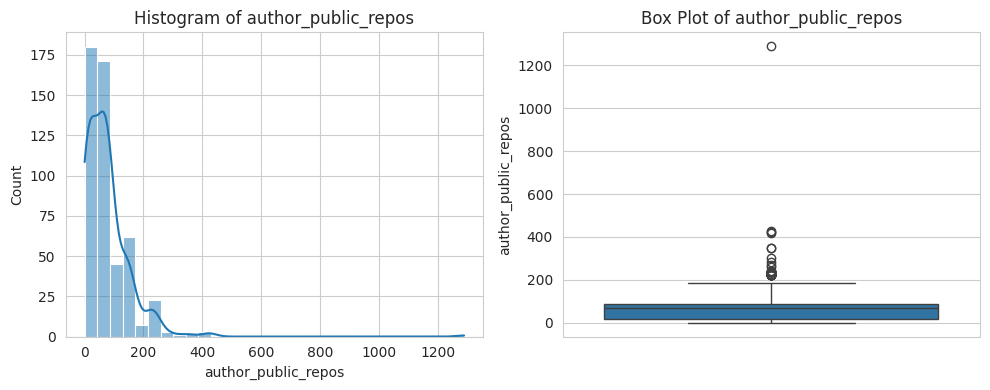

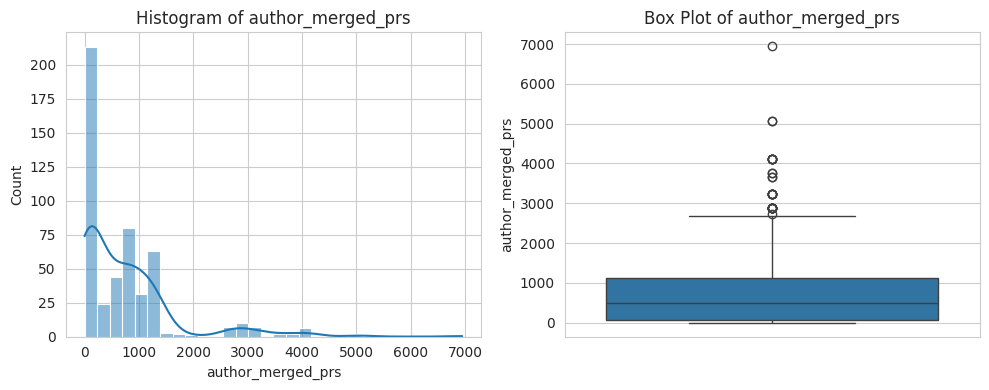

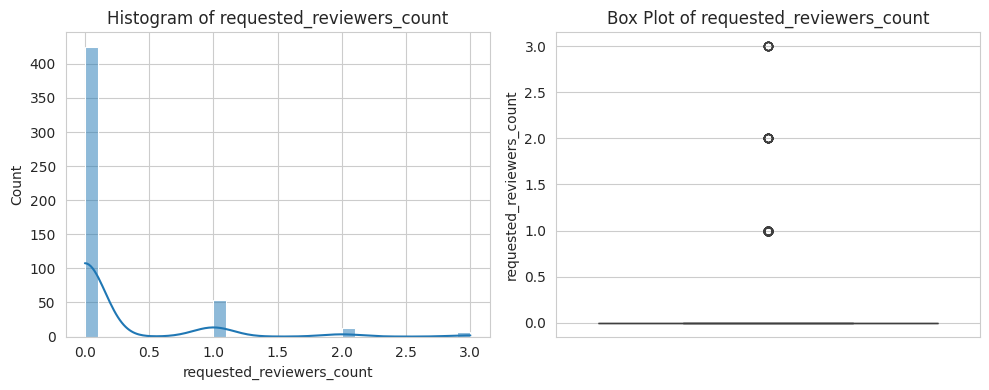

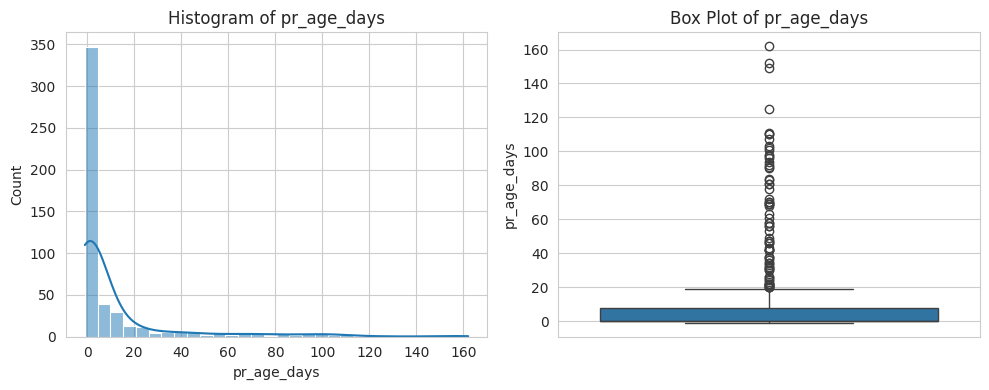

In [7]:
# 3. Numeric Feature Distributions
numeric_cols = [
    "additions", "deletions", "changed_files", "comments", "commits",
    "author_account_age_days", "author_public_repos", "author_merged_prs",
    "requested_reviewers_count", "pr_age_days"
]
print("\n=== Numeric Feature Distributions ===")
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()
    plt.show()


=== Boolean Feature Distributions ===


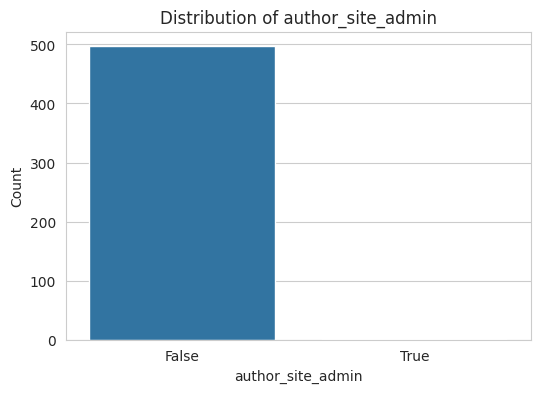

Proportion of author_site_admin:


author_site_admin
False    0.997992
True     0.002008
Name: proportion, dtype: float64

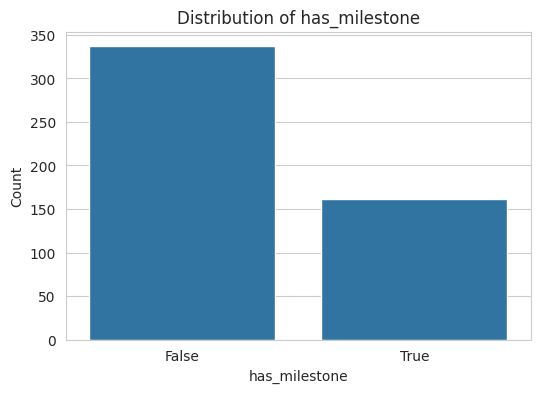

Proportion of has_milestone:


has_milestone
False    0.676707
True     0.323293
Name: proportion, dtype: float64

In [8]:
# 4. Categorical/Boolean Feature Distributions
boolean_cols = ["author_site_admin", "has_milestone"]
print("\n=== Boolean Feature Distributions ===")
for col in boolean_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    print(f"Proportion of {col}:")
    display(data[col].value_counts(normalize=True))


=== Labels Distribution ===


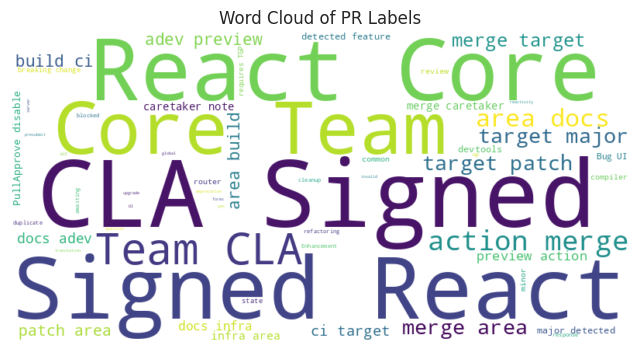

Top 5 Labels:


CLA Signed         87
React Core Team    73
action: merge      55
area: docs         33
target: major      28
Name: count, dtype: int64

In [9]:
# Labels (split comma-separated strings)
print("\n=== Labels Distribution ===")
labels = data["labels"].str.split(",", expand=True).stack().str.strip()
labels = labels[labels != ""]
plt.figure(figsize=(8, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(labels))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of PR Labels")
plt.show()
print("Top 5 Labels:")
display(labels.value_counts().head())


=== Feature-Target Relationships ===


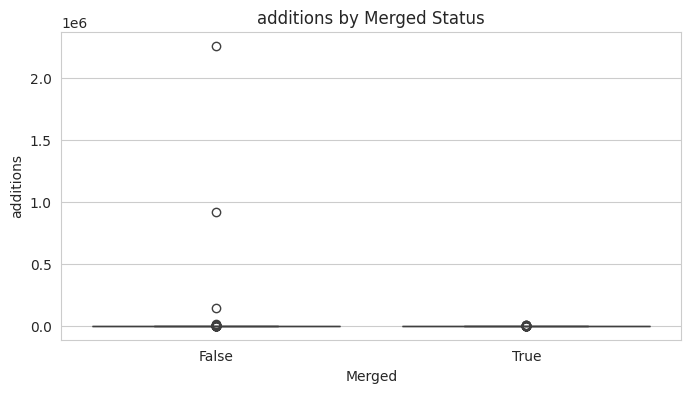

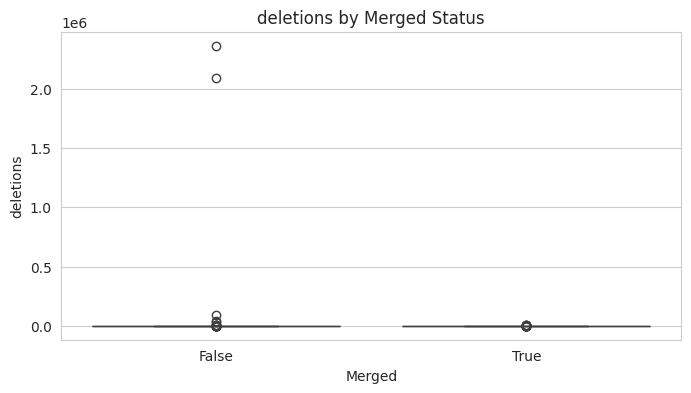

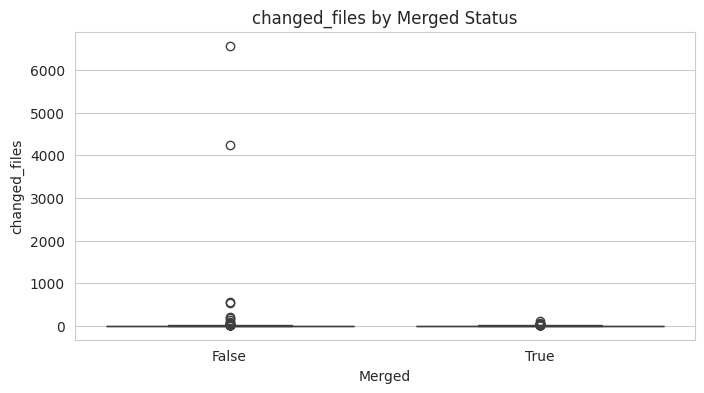

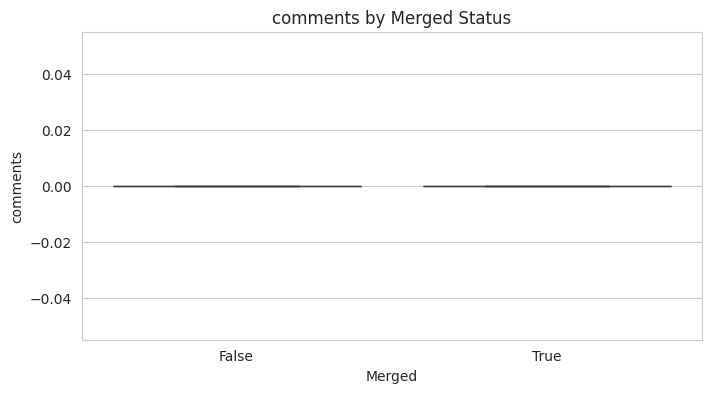

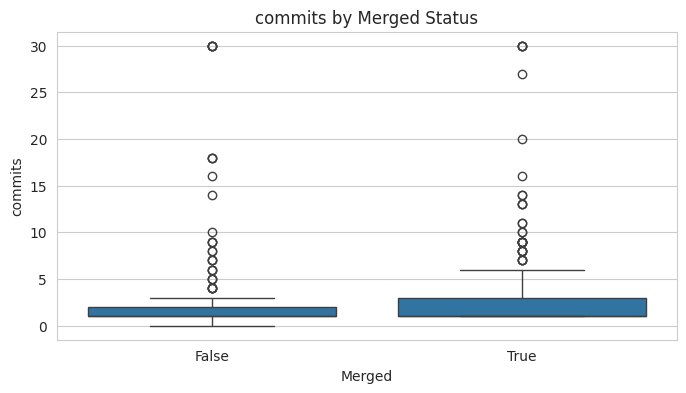

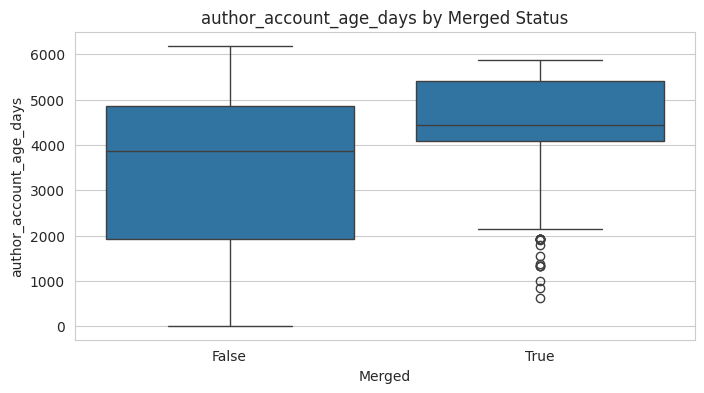

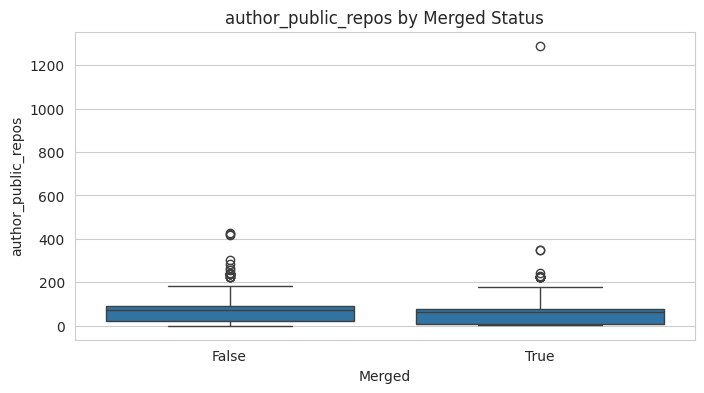

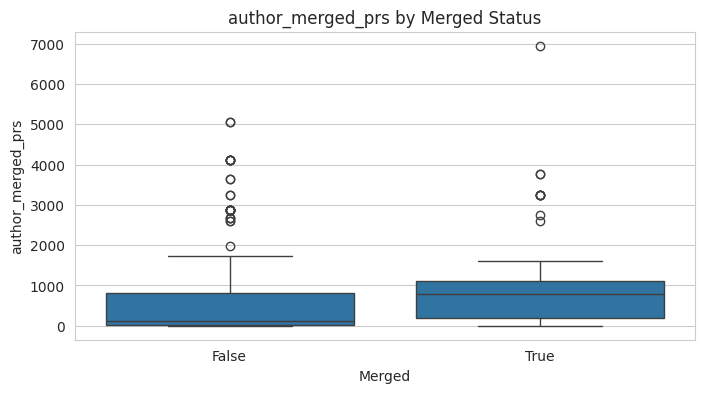

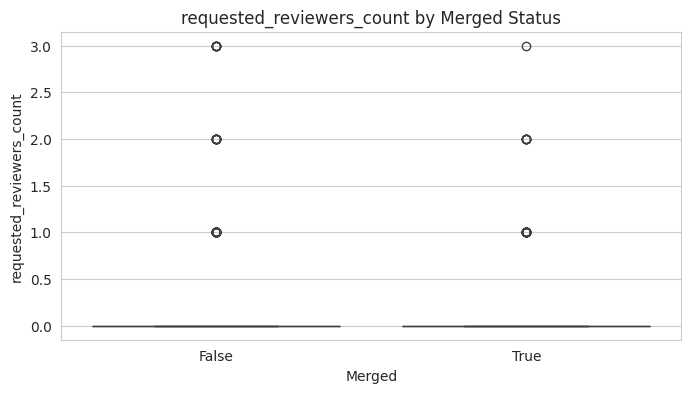

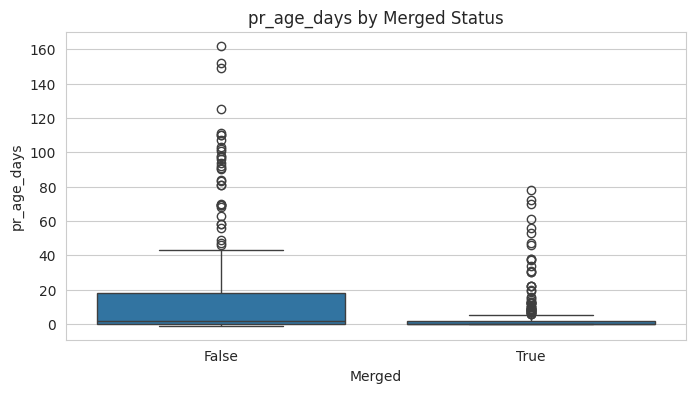

In [10]:
# 5. Feature-Target Relationships
print("\n=== Feature-Target Relationships ===")
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="merged", y=col, data=data)
    plt.title(f"{col} by Merged Status")
    plt.xlabel("Merged")
    plt.ylabel(col)
    plt.show()

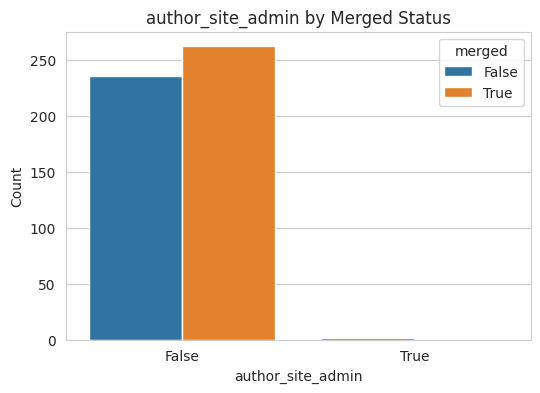

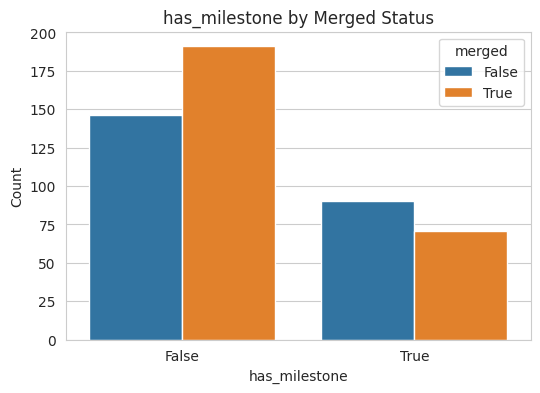

In [11]:
for col in boolean_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="merged", data=data)
    plt.title(f"{col} by Merged Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

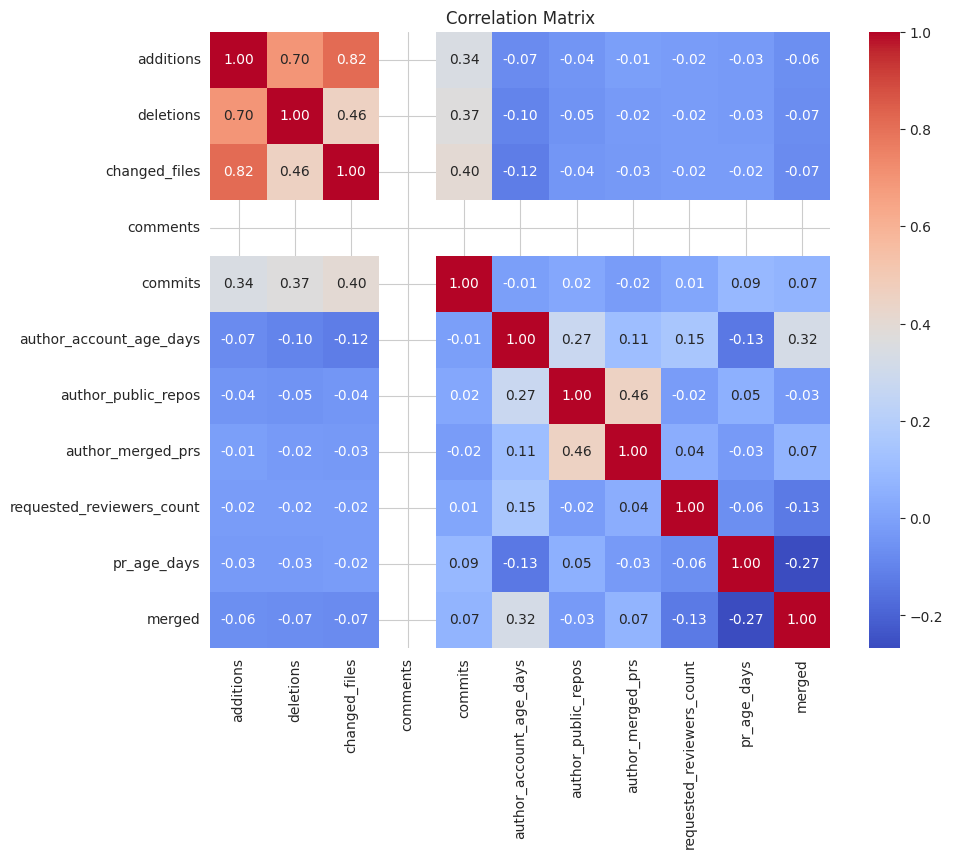

In [12]:
# Correlation matrix for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols + ["merged"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


=== Text Feature Exploration ===


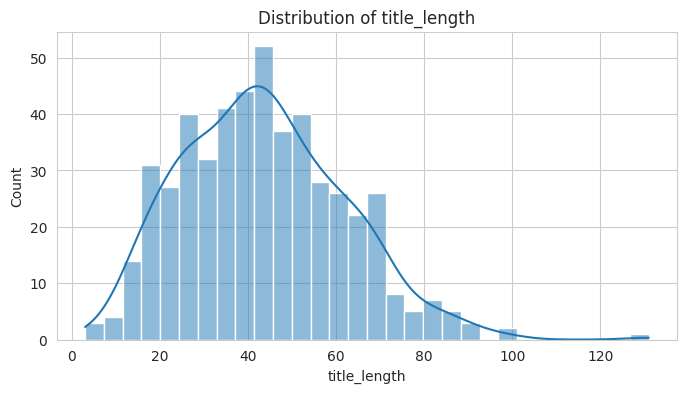

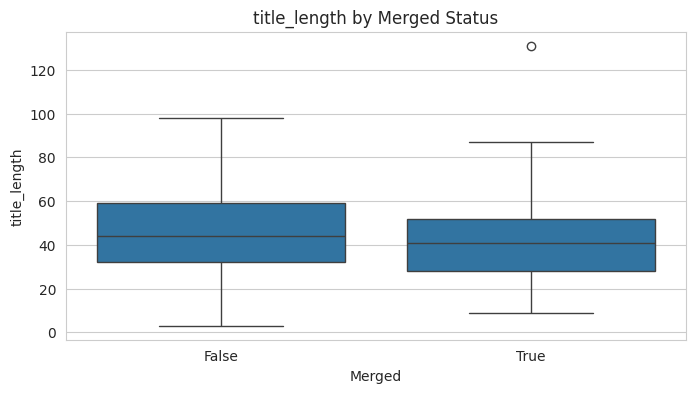

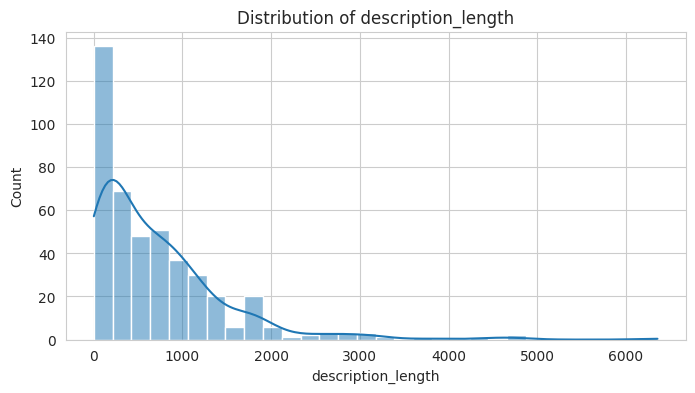

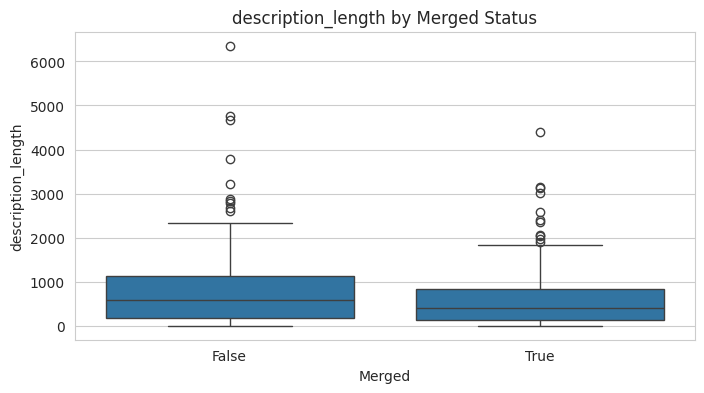

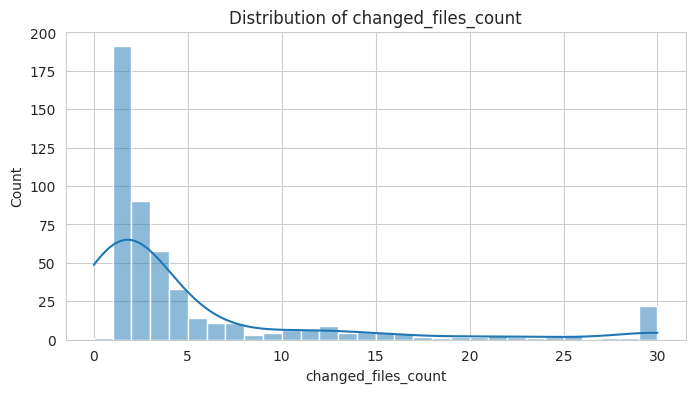

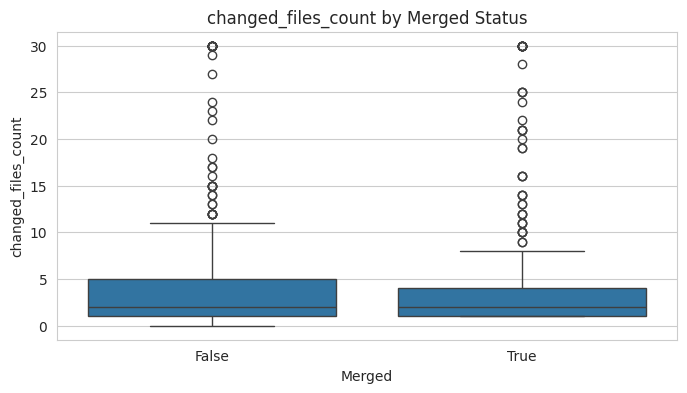

In [13]:
# 6. Text Feature Exploration
print("\n=== Text Feature Exploration ===")
# Add length columns
data["title_length"] = data["title"].str.len()
data["description_length"] = data["description"].str.len()
data["changed_files_count"] = data["changed_files_list"].str.split(",").str.len().fillna(0)

text_cols = ["title_length", "description_length", "changed_files_count"]
for col in text_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="merged", y=col, data=data)
    plt.title(f"{col} by Merged Status")
    plt.xlabel("Merged")
    plt.ylabel(col)
    plt.show()

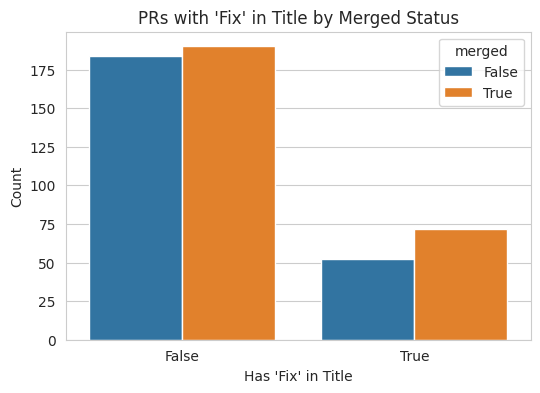

In [14]:
# Keyword example: "fix" in title
data["has_fix_in_title"] = data["title"].str.lower().str.contains("fix|bugfix|hotfix", na=False)
plt.figure(figsize=(6, 4))
sns.countplot(x="has_fix_in_title", hue="merged", data=data)
plt.title("PRs with 'Fix' in Title by Merged Status")
plt.xlabel("Has 'Fix' in Title")
plt.ylabel("Count")
plt.show()